In [41]:
# Đỗ Công Danh 19146163
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation ='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [33]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [23]:
%cd"/content/drive/MyDrive/Colab Notebooks/CNN_3Face"

/content/drive/MyDrive/Colab Notebooks/CNN_3Face


In [24]:
%ls

Kiem_thu/  Test_set/  Training_set/


In [34]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_3Face/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 192 images belonging to 3 classes.


In [35]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_3Face/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 42 images belonging to 3 classes.


In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(training_set,epochs = 20,validation_data=test_set,verbose = 1)

Epoch 1/20
6/6 [==============================] - 89s 14s/step - loss: 1.4998 - accuracy: 0.3073 - val_loss: 1.0644 - val_accuracy: 0.3333
Epoch 2/20
6/6 [==============================] - 35s 6s/step - loss: 0.8524 - accuracy: 0.5573 - val_loss: 0.7322 - val_accuracy: 0.5714
Epoch 3/20
6/6 [==============================] - 35s 6s/step - loss: 0.5238 - accuracy: 0.8021 - val_loss: 0.3126 - val_accuracy: 0.9286
Epoch 4/20
6/6 [==============================] - 36s 6s/step - loss: 0.3006 - accuracy: 0.8958 - val_loss: 0.1415 - val_accuracy: 0.9762
Epoch 5/20
6/6 [==============================] - 35s 5s/step - loss: 0.1698 - accuracy: 0.9375 - val_loss: 0.1065 - val_accuracy: 0.9762
Epoch 6/20
6/6 [==============================] - 35s 6s/step - loss: 0.1738 - accuracy: 0.9323 - val_loss: 0.1913 - val_accuracy: 0.9524
Epoch 7/20
6/6 [==============================] - 35s 6s/step - loss: 0.2351 - accuracy: 0.9375 - val_loss: 0.1463 - val_accuracy: 0.9524
Epoch 8/20
6/6 [=================

In [48]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

array([1])

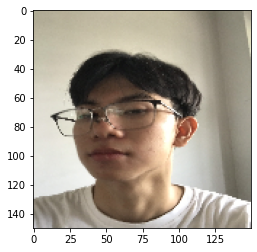

In [50]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/Colab Notebooks/CNN_3Face/Training_set/Nhan/z3412764313566_1e804bbc83197299d280cdbb37413145.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([0])

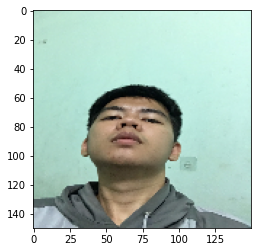

In [51]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/Colab Notebooks/CNN_3Face/Training_set/Danh/Danh (1).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([2])

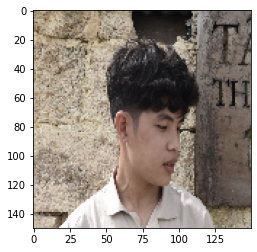

In [52]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/Colab Notebooks/CNN_3Face/Training_set/Phap/Phap (1).JPG',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)